# Fauzan Taufik

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## DataSet Information

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

## Attribute Infromation

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with 
letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.	

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.


In [115]:
online = pd.read_excel('Online Retail.xlsx')

In [116]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [117]:
online[online['CustomerID'].isnull()].nunique()

InvoiceNo      3710
StockCode      3810
Description    3554
Quantity        541
InvoiceDate    3161
UnitPrice      1195
CustomerID        0
Country           9
dtype: int64

In [118]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [119]:
online.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [120]:
online.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
online.shape

(541909, 8)

In [121]:
# Treat Missing Values as 1 Group ID

online['CustomerID'].dropna(inplace=True)

In [143]:
# In attribute Information, if the code of InvoiceNo have first letter 'c', it's indicate cancelation, we will find calcel transaction

import re

def cancelation(x) :
    x = str(x)
    pattern = r'[C]'
    return re.findall(pattern, x)

cancel = online['InvoiceNo'].apply(lambda x: True if 'C' in cancelation(x) else False)

print("Number of Cancel Transaction is {}".format(cancel.sum()))

Number of Cancel Transaction is 9288


In [144]:
online['Cancel'] = cancel

online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,FirsTransaction,Cohort_Index,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1.0,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1.0,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,False


In [150]:
# Delete Cancel Transaction
idx_cancel = online[online['Cancel']==True].index

online.drop(index=idx_cancel, inplace=True)

In [151]:
online.shape

(532621, 13)

## Type Of Segmentation

There is 3 type of segmentation based on database we have :
1. Demographic – You can segment visitors by demographic but when we are looking at websites, this information is not great as we can’t make great use of it
2. Attitudinal – You won’t know if customers are happy or unhappy until they complete a survey online but that isn’t going to be helpful initially
3. Behavioral – In the online world, segmenting visitors by behaviour is key. We can optimise a website experience a lot faster with this type of segmentation

In [152]:
# Calculate Total Price

online['TotalPrice'] = online['UnitPrice']*online['Quantity']

## Behavioral Transaction of Country

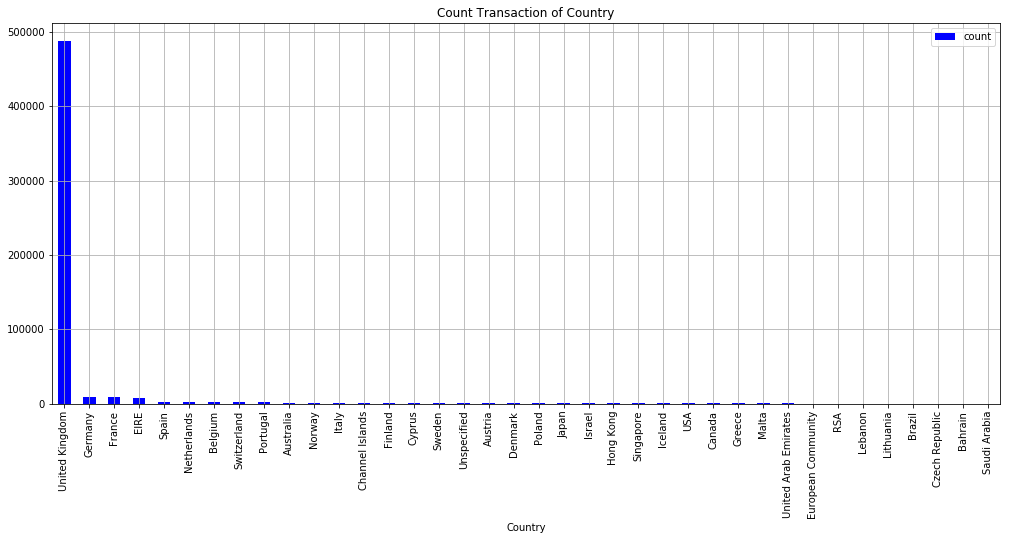

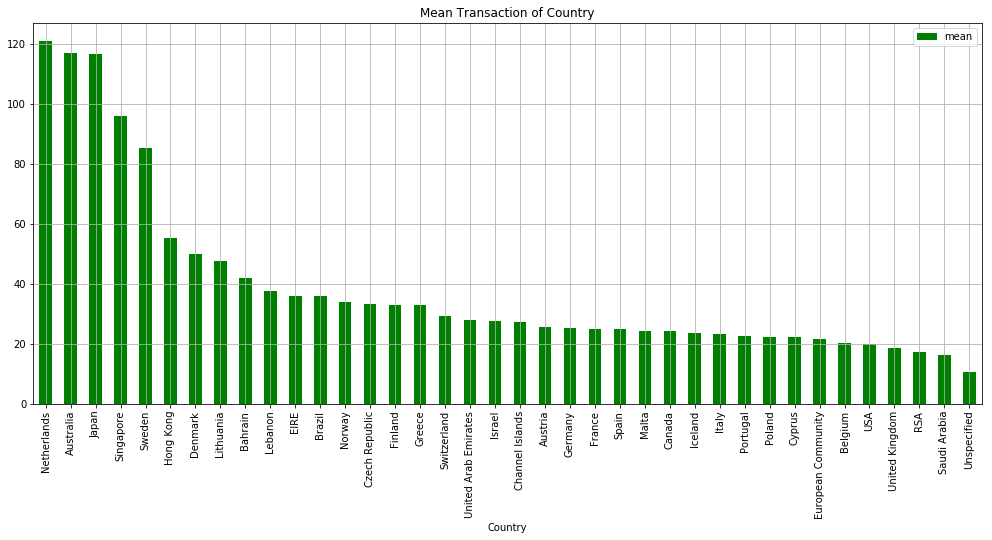

In [153]:
# I will see behavioral transaction base on country

country_market = online.groupby('Country').agg({'TotalPrice':['mean', 'count']})
country_most_transaction = country_market['TotalPrice']['count'].reset_index().sort_values('count', ascending=False)
country_market_transaction = country_market['TotalPrice']['mean'].reset_index().sort_values('mean', ascending=False)

#Graphing of Count Transaction of Country
country_most_transaction.plot(kind='bar', color='blue', rot=90, grid=True, figsize=(17, 7))

index = country_most_transaction.Country 
plt.xticks(np.arange(len(country_most_transaction)), index)
plt.xlabel('Country')
plt.title('Count Transaction of Country')
plt.show()

#Graphing of Mean Transaction of Country
country_market_transaction.plot(kind='bar', color='green', rot=90, grid=True, figsize=(17, 7))

index = country_market_transaction.Country
plt.xticks(np.arange(len(index)), index)
plt.xlabel('Country')
plt.title('Mean Transaction of Country')
plt.show()

In [154]:
print(country_market_transaction.head())
print()
print(country_most_transaction.head())

        Country        mean
24  Netherlands  120.798282
0     Australia  116.895620
20        Japan  116.561900
30    Singapore   95.852658
32       Sweden   85.096075

           Country   count
36  United Kingdom  487622
14         Germany    9042
13          France    8408
10            EIRE    7894
31           Spain    2485


## Data above  can we countinue for segmentation market by Country, but here I wanna focus to segmentation of Customer

To get Understanding about our product lifetime and customer lifetime, I will do <b><i>Cohort Analysis</i></b>

For Segmentation I will do some Technique :<b><i>
1. RFMT (Recency, Frequency, MarketValue, Tanure)
2. KMeans
</i></b>

## Cohort Analysis

In [155]:
# Cohort Analysis

import datetime as dt

# Define function to parse date
def get_day(x) : return dt.datetime(x.year, x.month, 1)

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_day)

#Grouping by Customer and get the first day they do transaction
online['FirsTransaction'] = online.groupby('CustomerID')['InvoiceMonth'].transform('min')

#Define function to create cohort Index and Create Cohort Index Columns
def get_date_int(df, column) :
    year = df[column].dt.year
    month = df[column].dt.month
    
    return year, month

def cohort_index(data, datetransaction, firsttransaction) :
    
    invoice_year, invoice_month = get_date_int(data, datetransaction)
    cohort_year, cohort_month = get_date_int(data, firsttransaction)
    
    years_diff = invoice_year - cohort_year
    month_diff = invoice_month - cohort_month
    
    cohort_index = years_diff*12 + month_diff + 1
    
    return cohort_index

cohort_index = cohort_index(online, 'InvoiceMonth', 'FirsTransaction')

online['Cohort_Index'] = cohort_index

online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,FirsTransaction,Cohort_Index,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1.0,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1.0,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0,False


In [156]:
# Count the number of unique values per customer ID
cohort_data = online.groupby(['FirsTransaction', 'Cohort_Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data = cohort_data.rename(columns={'FirsTransaction':'Cohort_Month', 'CustomerID':'N_CustomerID'})

cohort_data.head(10)

,Cohort_Month,Cohort_Index,N_CustomerID
0,2010-12-01,1.0,885
1,2010-12-01,2.0,324
2,2010-12-01,3.0,286
3,2010-12-01,4.0,340
4,2010-12-01,5.0,321
5,2010-12-01,6.0,352
6,2010-12-01,7.0,321
7,2010-12-01,8.0,309
8,2010-12-01,9.0,313
9,2010-12-01,10.0,350


In [157]:
#Pivot Cohort Data
cohort_data = cohort_data.pivot(index='Cohort_Month', columns='Cohort_Index', values='N_CustomerID')

In [158]:
cohort_data

Cohort_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort_Month,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Calculate Retention
cohort_size = cohort_data.iloc[:, 0]

cohort_retention = cohort_data.divide(cohort_size, axis=0)

cohort_retention

Cohort_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort_Month,,,,,,,,,,,,,
2010-12-01,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


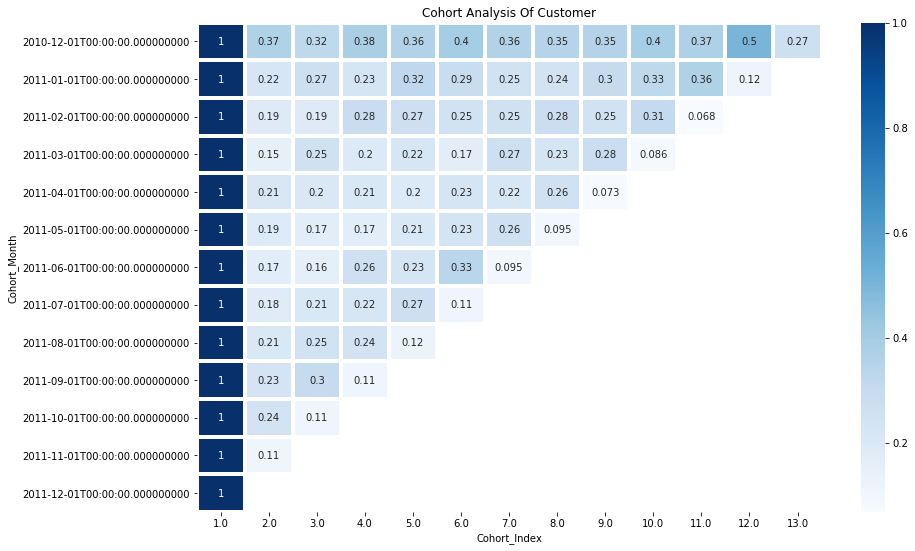

Veritical Axis Indicate Product LifeTime, and Horizontal Axis Indicate Customer LifeTime


In [160]:
#Visualize Cohort Data
plt.figure(figsize=(14, 9))
sns.heatmap(cohort_retention, annot=True, linewidths=3, cmap='Blues')
plt.title('Cohort Analysis Of Customer')
plt.show()

print('Veritical Axis Indicate Product LifeTime, and Horizontal Axis Indicate Customer LifeTime')

In [161]:
# Calculate Cohort Analysis For Total of Price by Time

cohort_price = online.groupby(['FirsTransaction', 'Cohort_Index'])['TotalPrice'].sum().reset_index()
cohort_price = cohort_price.rename(columns={'FirsTransaction':'Cohort_Month', 'TotalPrice':'Revenue'})
cohort_price.head()

,Cohort_Month,Cohort_Index,Revenue
0,2010-12-01,1.0,572713.89
1,2010-12-01,2.0,276237.69
2,2010-12-01,3.0,233845.37
3,2010-12-01,4.0,303119.39
4,2010-12-01,5.0,204407.66


In [162]:
cohort_price = cohort_price.pivot(index='Cohort_Month', columns='Cohort_Index', values='Revenue')

cohort_size = cohort_price.iloc[:, 0]

cohort_price = cohort_price.divide(cohort_size, axis=0)

In [163]:
cohort_price

Cohort_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort_Month,,,,,,,,,,,,,
2010-12-01,1.0,0.482331,0.408311,0.529268,0.356911,0.587776,0.548551,0.542651,0.579258,0.825567,0.796350,0.897138,0.324426
2011-01-01,1.0,0.188092,0.215780,0.244153,0.276644,0.288478,0.239105,0.247912,0.245641,0.381313,0.422507,0.090260,NaN
2011-02-01,1.0,0.183653,0.260110,0.305035,0.253872,0.216408,0.314316,0.394903,0.350192,0.409818,0.067030,NaN,NaN
2011-03-01,1.0,0.150245,0.295184,0.214008,0.258196,0.200034,0.324484,0.354996,0.356205,0.064318,NaN,NaN,NaN
2011-04-01,1.0,0.241394,0.205530,0.199256,0.215670,0.247569,0.234970,0.280536,0.052045,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.150541,0.162717,0.154404,0.224505,0.265718,0.268428,1.444368,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.109068,0.104281,0.228090,0.197097,0.315363,0.060610,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.159301,0.209897,0.237154,0.263646,0.082047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.262838,0.445156,0.558475,0.191639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


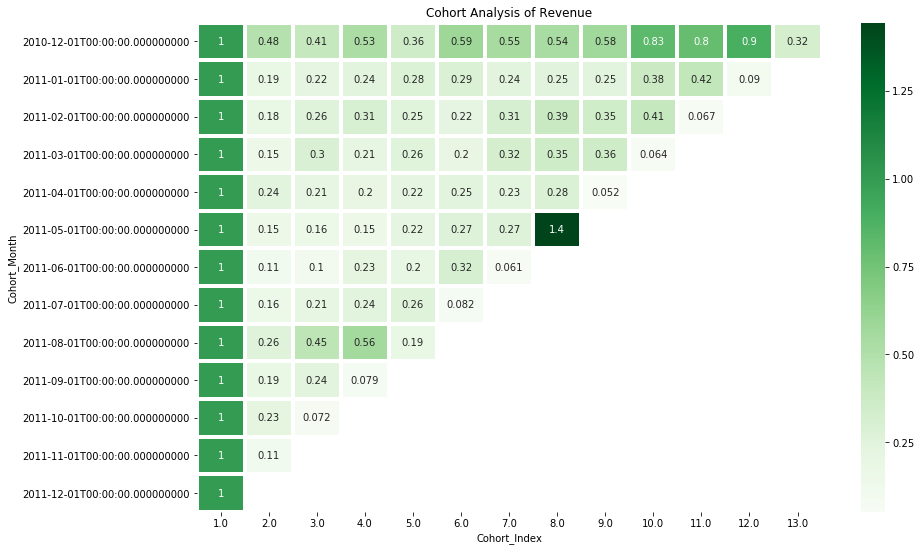

In [164]:
#Visualize Cohort Analysis of Revenue

plt.figure(figsize=(14, 9))
sns.heatmap(cohort_price, annot=True, linewidths=3, cmap='Greens')
plt.title('Cohort Analysis of Revenue')
plt.show()

# RFMT Analysis (Recency, Frequency, MonetaryValue, Tenure)

In [165]:
#Calculate RFMT

current_time = max(online['InvoiceDate']) + dt.timedelta(days=1)

RFMT = online.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x : (current_time - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalPrice' : 'sum'})

RFMT = RFMT.rename(columns = {'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'MonetaryValue'})

RFMT['Tenure'] = online.groupby('CustomerID').agg({'InvoiceDate':lambda x : (current_time - x.min()).days}).rename(
    columns={'InvoiceDate':'Tenure'})

In [166]:
RFMT.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,1,77183.60,326
12347.0,2,182,4310.00,367
12348.0,75,31,1797.24,358
12349.0,19,73,1757.55,19
12350.0,310,17,334.40,310


In [168]:
# Build RFMT segment

RFMT['R'] = pd.qcut(RFMT['Recency'], q=3, labels=range(3, 0, -1))
RFMT['F'] = pd.qcut(RFMT['Frequency'], q=3, labels=range(1, 4))
RFMT['M'] = pd.qcut(RFMT['MonetaryValue'], q=3, labels=range(1, 4))
RFMT['T'] = pd.qcut(RFMT['Tenure'], q=3, labels=range(1, 4))

RFMT.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T
CustomerID,,,,,,,,
12346.0,326,1,77183.60,326,1,1,3,3
12347.0,2,182,4310.00,367,3,3,3,3
12348.0,75,31,1797.24,358,2,2,3,3
12349.0,19,73,1757.55,19,3,2,3,1
12350.0,310,17,334.40,310,1,1,1,3


In [169]:
# Calculate RFMT Score

RFMT['RFMT_Score'] = RFMT[['R', 'F', 'M', 'T']].sum(axis=1)

# Calculate RFMT Level

def RFMT_level(df) :
    if df['RFMT_Score'] <= 4 :
        return 'Low'
    if (df['RFMT_Score'] <= 8) and (df['RFMT_Score'] >4) :
        return 'Middle'
    else :
        return 'Top'
    
RFMT['RFMT_Level'] = RFMT.apply(RFMT_level, axis=1)

RFMT.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,RFMT_Score,RFMT_Level
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,326,1,1,3,3,8.0,Middle
12347.0,2,182,4310.00,367,3,3,3,3,12.0,Top
12348.0,75,31,1797.24,358,2,2,3,3,10.0,Top
12349.0,19,73,1757.55,19,3,2,3,1,9.0,Top
12350.0,310,17,334.40,310,1,1,1,3,6.0,Middle


In [170]:
RFMT_level_agg = RFMT.groupby('RFMT_Level').agg({'Recency':'mean',
                                                'Frequency':'mean',
                                                'MonetaryValue':'mean', 
                                                'Tenure':['mean', 'count']})

RFMT_level_agg

Recency   Frequency MonetaryValue      Tenure      
                  mean        mean          mean        mean count
RFMT_Level                                                        
Low         132.888000   10.368000    195.108160  134.160000   125
Middle      130.954509   28.718522    573.661069  181.379773  2462
Top          35.625571  186.029110   4266.361776  288.469178  1752

# KMeans Segmentation

Before Doing Segmentation By KMean, these are few step preprocessing :
1. No-Skewed Data
2. Have same mean and variance

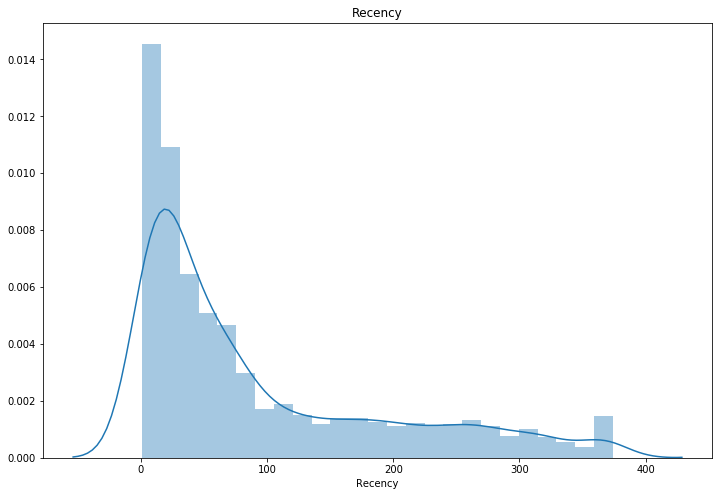

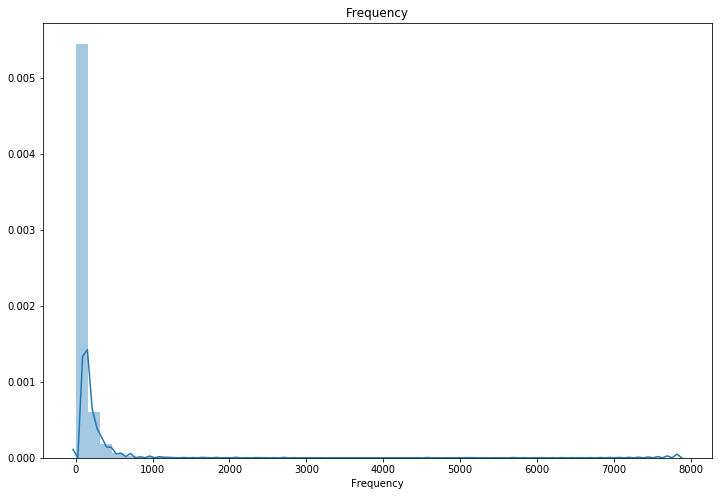

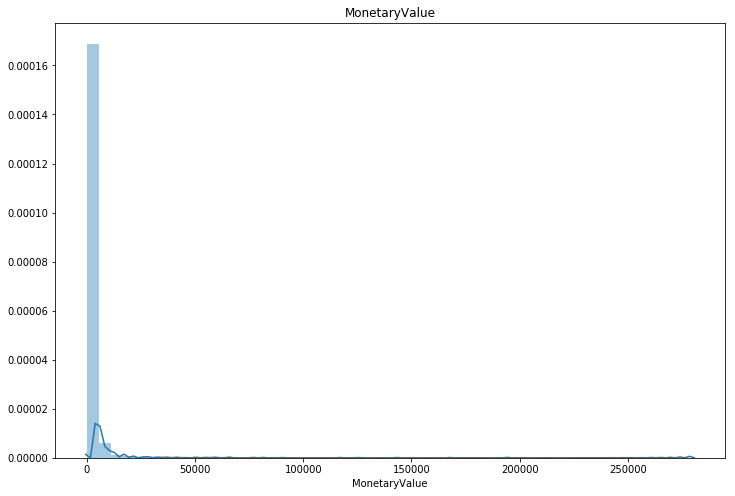

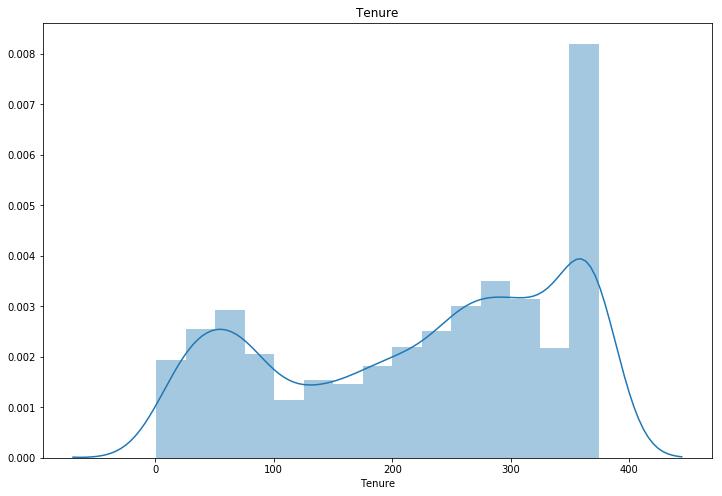

In [171]:
# Preprocessing Data (1)

var = ['Recency', 'Frequency', 'MonetaryValue', 'Tenure']
data = RFMT[var]

def distplot(df, columns) :
    plt.figure(figsize=(12, 8))
    sns.distplot(df[columns])
    plt.title(columns)
    plt.show()
    
for x in var :
    distplot(data, x)

In [188]:
# All Data are skew, so we need to transform them

for x in var :
    data[x+'_log'] = np.log(data[x]+1)
    

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


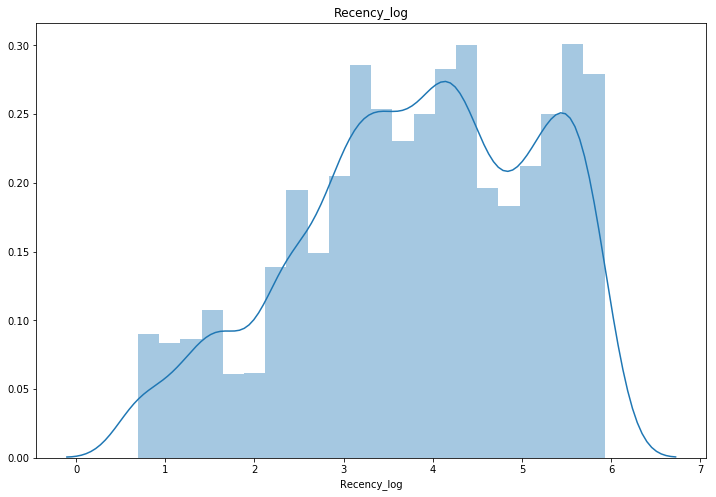

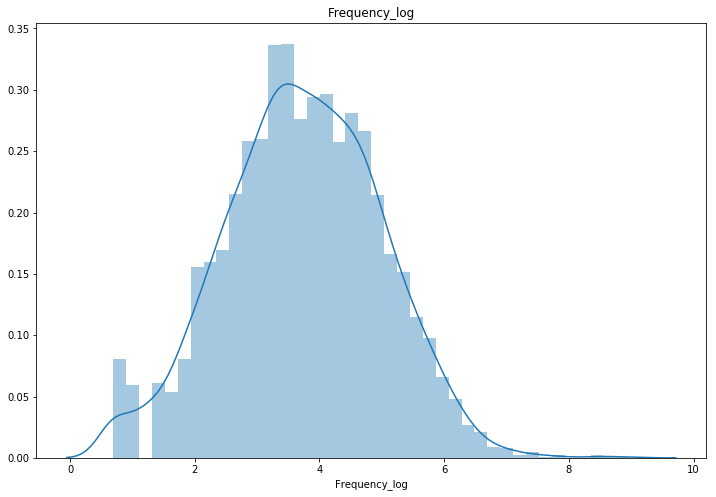

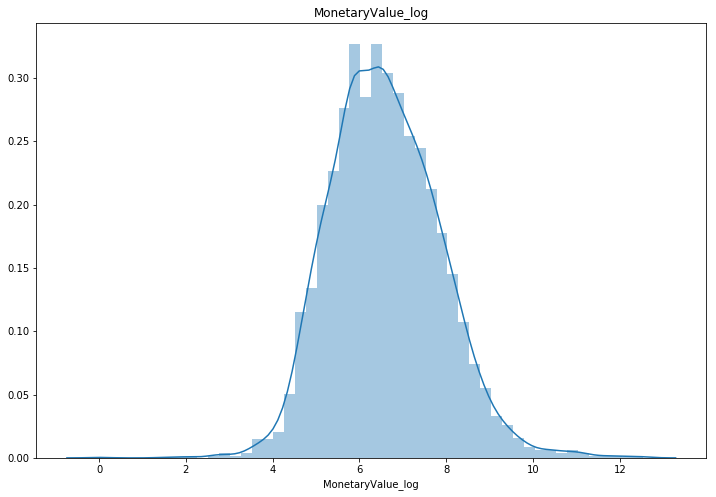

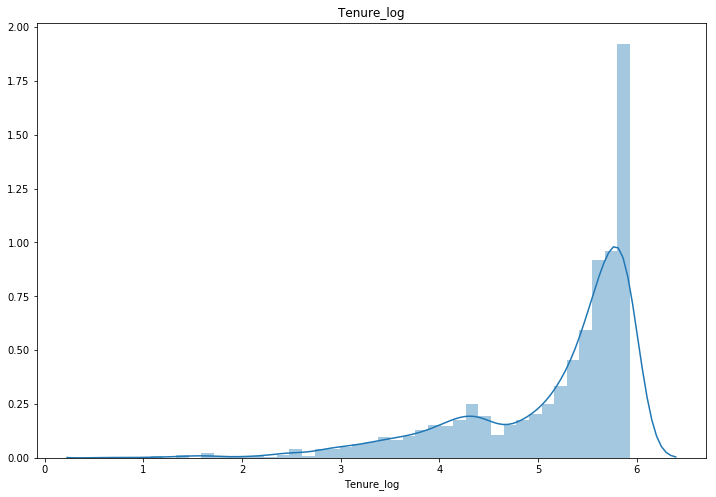

In [189]:
for x in var :
    distplot(data, x+'_log')

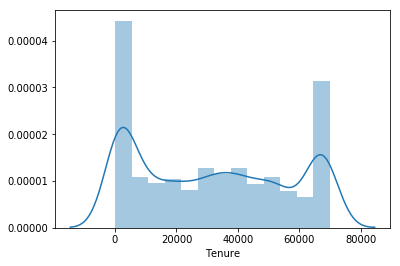

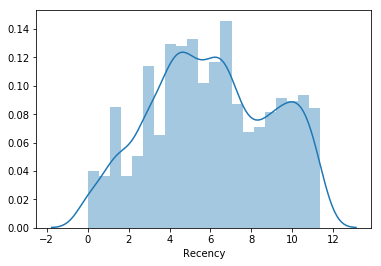

In [190]:
from scipy.special import boxcox

sns.distplot(boxcox(data['Tenure'], 2))
plt.show()

sns.distplot(boxcox(data['Recency'], 0.2))
plt.show()

In [191]:
# Tranform Recency and Tenure to non-skey distribution

data['Tenure_noskew'] = boxcox(data['Tenure'], 2)
data['Recency_noskew'] = boxcox(data['Recency'], 2)

data.head()

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Recency,Frequency,MonetaryValue,Tenure,Recency_log,Frequency_log,MonetaryValue_log,Tenure_log,Tenure_noskew,Recency_noskew
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,326,5.789960,0.693147,11.253955,5.789960,53137.5,53137.5
12347.0,2,182,4310.00,367,1.098612,5.209486,8.368925,5.908083,67344.0,1.5
12348.0,75,31,1797.24,358,4.330733,3.465736,7.494564,5.883322,64081.5,2812.0
12349.0,19,73,1757.55,19,2.995732,4.304065,7.472245,2.995732,180.0,180.0
12350.0,310,17,334.40,310,5.739793,2.890372,5.815324,5.739793,48049.5,48049.5


In [192]:
# Choose Data to Model

data_transform = data[['Frequency_log', 'MonetaryValue_log', 'Tenure_noskew', 'Recency_noskew']]

data_transform.head()

,Frequency_log,MonetaryValue_log,Tenure_noskew,Recency_noskew
CustomerID,,,,
12346.0,0.693147,11.253955,53137.5,53137.5
12347.0,5.209486,8.368925,67344.0,1.5
12348.0,3.465736,7.494564,64081.5,2812.0
12349.0,4.304065,7.472245,180.0,180.0
12350.0,2.890372,5.815324,48049.5,48049.5


In [193]:
# Data Preprocessing (2) = StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_transform)
data_ready = scaler.transform(data_transform)

data_ready

array([[-2.43282745,  3.69616759,  0.87104931,  2.71169354],
       [ 1.17736943,  1.40875812,  1.4529698 , -0.57362208],
       [-0.21652101,  0.71551656,  1.31933269, -0.39985327],
       ...,
       [-0.93657697, -1.11351869, -0.98041349, -0.57176723],
       [ 2.31236747,  0.83695422,  1.02041566, -0.57325111],
       [ 0.42052698,  0.73297676, -0.46986853, -0.51658535]])

In [194]:
data_ready = pd.DataFrame(data_ready, columns = data_transform.columns, index=data_transform.index)

data_ready.describe().round(2)

,Frequency_log,MonetaryValue_log,Tenure_noskew,Recency_noskew
count,4339.00,4339.00,4339.00,4339.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.43,-5.23,-1.31,-0.57
25%,-0.68,-0.68,-1.04,-0.56
50%,0.00,-0.06,-0.04,-0.49
75%,0.70,0.65,0.88,0.05
max,4.18,4.72,1.56,3.75


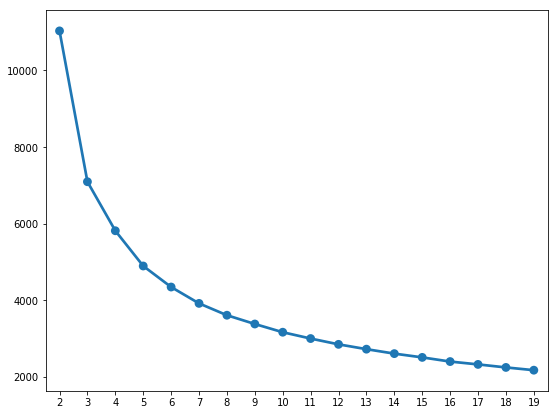

In [195]:
# Clustering Data

from sklearn.cluster import KMeans

# Find Best N cluster

n_clusters = np.arange(2, 20)
sse = {}
for k in n_clusters :
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(data_ready)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(9, 7))
sns.pointplot(list(sse.keys()), list(sse.values()))
plt.show()

In [203]:
# I think 5 is good

kmeans = KMeans(n_clusters=4, random_state=3)
kmeans.fit(data_ready)
data_ready['cluster_label'] = kmeans.labels_

data_ready.head()

,Frequency_log,MonetaryValue_log,Tenure_noskew,Recency_noskew,cluster_label
CustomerID,,,,,
12346.0,-2.432827,3.696168,0.871049,2.711694,3
12347.0,1.177369,1.408758,1.452970,-0.573622,0
12348.0,-0.216521,0.715517,1.319333,-0.399853,0
12349.0,0.453609,0.697821,-1.298173,-0.562586,2
12350.0,-0.676446,-0.615877,0.662637,2.397110,3


In [204]:
data_melt = data_ready.reset_index().melt(id_vars=['CustomerID', 'cluster_label'], value_vars=['Frequency_log', 
                                                                                              'MonetaryValue_log', 
                                                                                              'Tenure_noskew', 
                                                                                              'Recency_noskew'], 
                                         var_name='Metrics', value_name='Value')

data_melt.head()

,CustomerID,cluster_label,Metrics,Value
0,12346.0,3,Frequency_log,-2.432827
1,12347.0,0,Frequency_log,1.177369
2,12348.0,0,Frequency_log,-0.216521
3,12349.0,2,Frequency_log,0.453609
4,12350.0,3,Frequency_log,-0.676446


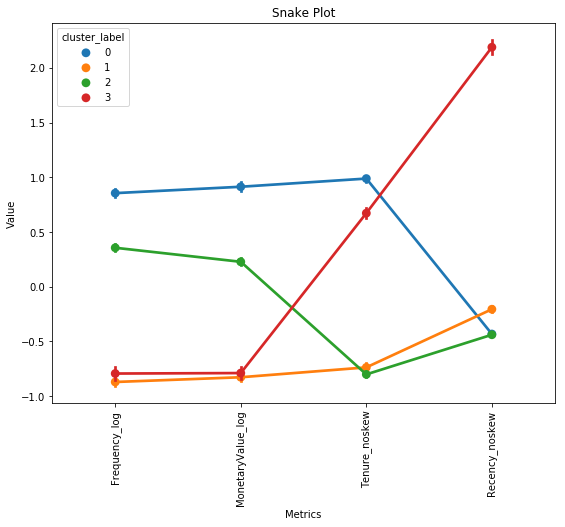

In [205]:
plt.figure(figsize=(9, 7))
sns.pointplot(x='Metrics', y='Value', hue='cluster_label', data=data_melt)
plt.xticks(rotation=90)
plt.title('Snake Plot')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
# Visualization relative importance of each Attribute

In [225]:
data['cluster_label'] = kmeans.labels_

cluster_avg = data[['Frequency', 'MonetaryValue', 'Tenure', 'Recency', 'cluster_label']].groupby('cluster_label').mean()

cluster_avg

,Frequency,MonetaryValue,Tenure,Recency
cluster_label,,,,
0,196.139685,4886.883311,332.348854,44.276504
1,17.083001,329.881804,135.355148,87.005587
2,82.357739,1266.591308,136.574606,46.427247
3,22.657938,506.260033,307.368249,295.440262


In [229]:
pop_avg = data[['Frequency', 'MonetaryValue', 'Tenure', 'Recency']].mean()

pop_avg

Frequency          91.708689
MonetaryValue    2053.793018
Tenure            223.259968
Recency            92.518322
dtype: float64

In [230]:
data.head()

,Recency,Frequency,MonetaryValue,Tenure,Recency_log,Frequency_log,MonetaryValue_log,Tenure_log,Tenure_noskew,Recency_noskew,cluster_label
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,326,5.789960,0.693147,11.253955,5.789960,53137.5,53137.5,3
12347.0,2,182,4310.00,367,1.098612,5.209486,8.368925,5.908083,67344.0,1.5,0
12348.0,75,31,1797.24,358,4.330733,3.465736,7.494564,5.883322,64081.5,2812.0,0
12349.0,19,73,1757.55,19,2.995732,4.304065,7.472245,2.995732,180.0,180.0,2
12350.0,310,17,334.40,310,5.739793,2.890372,5.815324,5.739793,48049.5,48049.5,3


In [231]:
relative_imp = cluster_avg/pop_avg - 1

relative_imp.round(2)

,Frequency,MonetaryValue,Tenure,Recency
cluster_label,,,,
0,1.14,1.38,0.49,-0.52
1,-0.81,-0.84,-0.39,-0.06
2,-0.10,-0.38,-0.39,-0.50
3,-0.75,-0.75,0.38,2.19


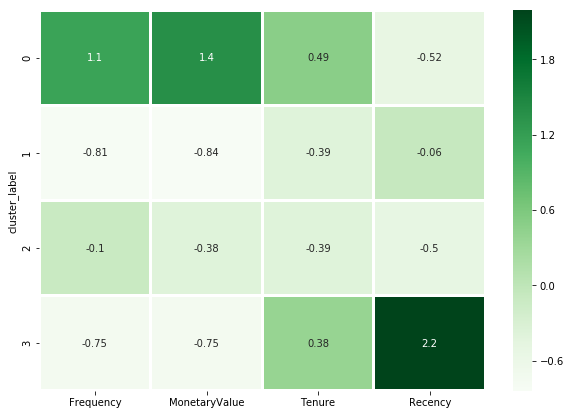

In [232]:
plt.figure(figsize=(10, 7))
sns.heatmap(relative_imp.round(2), annot=True, linewidths=2, cmap='Greens')
plt.show()